# Save to numpy data

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Import neccessary libraries

In [2]:
import os
import sys
import glob
import cv2

import pandas as pd
import numpy as np
from natsort import natsorted

import matplotlib
matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

%matplotlib notebook

# Read and save to numpy

In [3]:
# Global variables
vth_dir = 'data/VB_0519/VTH/'
z_dir = 'data/VB_0519/Z/'
h_dir = 'data/VB_0519/H/'

dimx = 465 + 2
dimy = 324 + 2
dimt = 2

vth_name = 'vth'+'_'+str(dimt).zfill(4) \
                +'_'+str(dimy).zfill(4) \
                +'_'+str(dimx).zfill(4)+'.npy'
z_name   =   'z'+'_'+str(dimt).zfill(4) \
                +'_'+str(dimy).zfill(4) \
                +'_'+str(dimx).zfill(4)+'.npy'
h_name   =   'z'+'_'+str(dimt).zfill(4) \
                +'_'+str(dimy).zfill(4) \
                +'_'+str(dimx).zfill(4)+'.npy'
print(vth_name)
print(z_name)
print(h_name)

debug = True

vth_0002_0326_0467.npy
z_0002_0326_0467.npy
z_0002_0326_0467.npy


# Parse VTH

**************************************************
['3600\t2\t2\t0\t0' '3600\t3\t2\t0\t0' '3600\t4\t2\t0\t0' ...
 '3600\t463\t324\t0\t0' '3600\t464\t324\t0\t0' '3600\t465\t324\t0\t0']
(149872, 5)
**************************************************
['7200\t2\t2\t0\t0' '7200\t3\t2\t0\t0' '7200\t4\t2\t0\t0' ...
 '7200\t463\t324\t0\t0' '7200\t464\t324\t0\t0' '7200\t465\t324\t0\t0']
(149872, 5)
(2, 149872, 5)


<IPython.core.display.Javascript object>


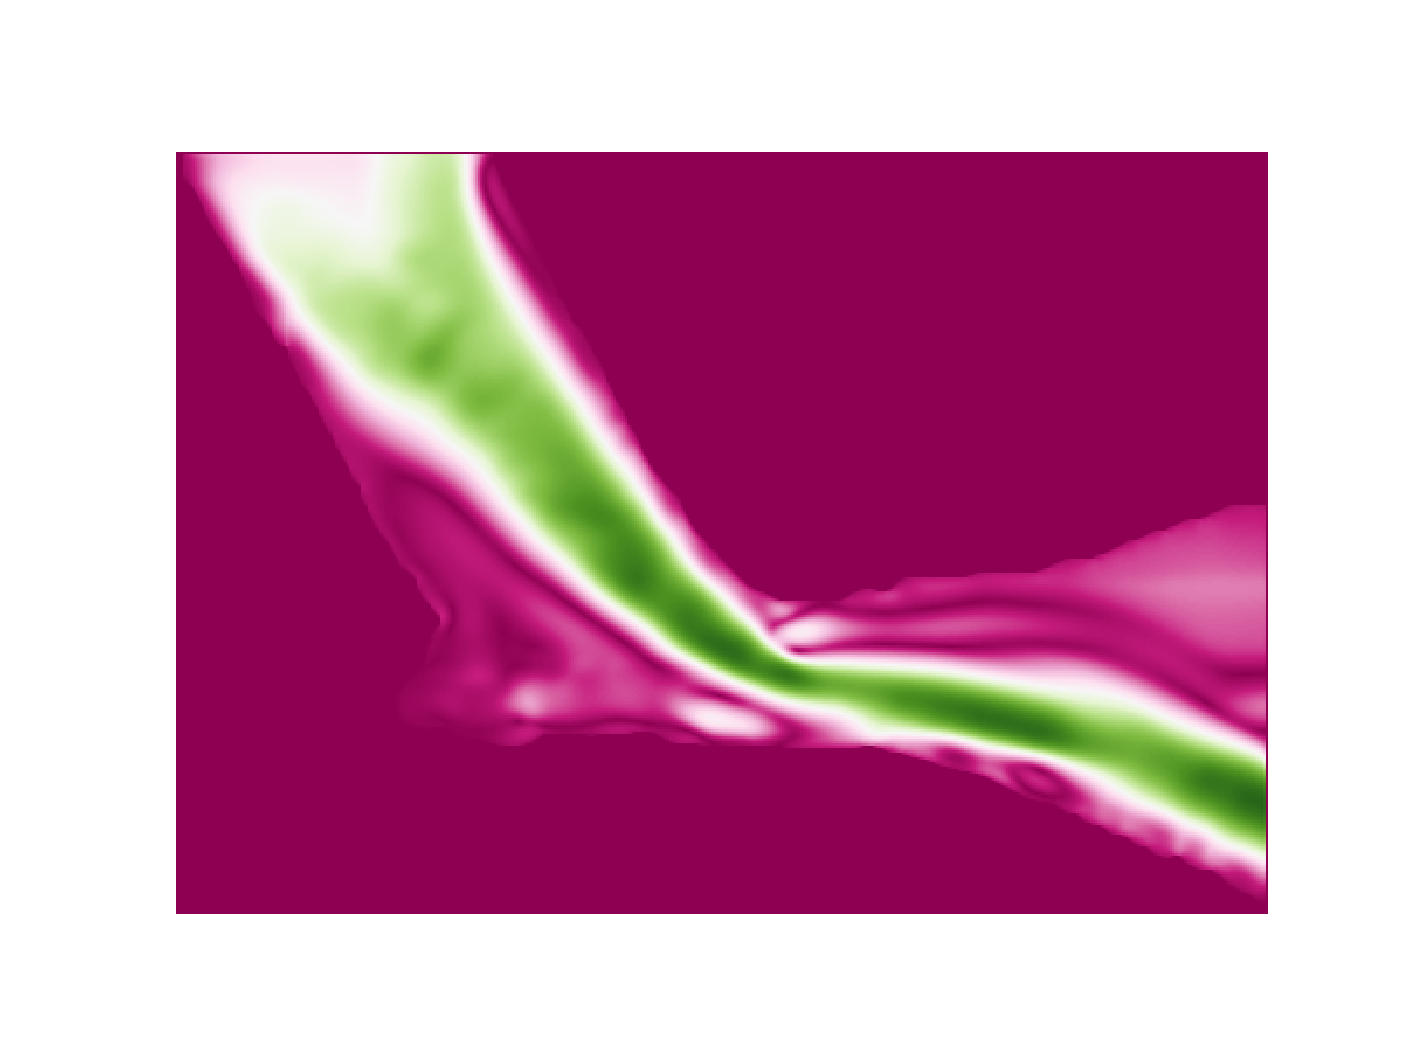

<IPython.core.display.Javascript object>


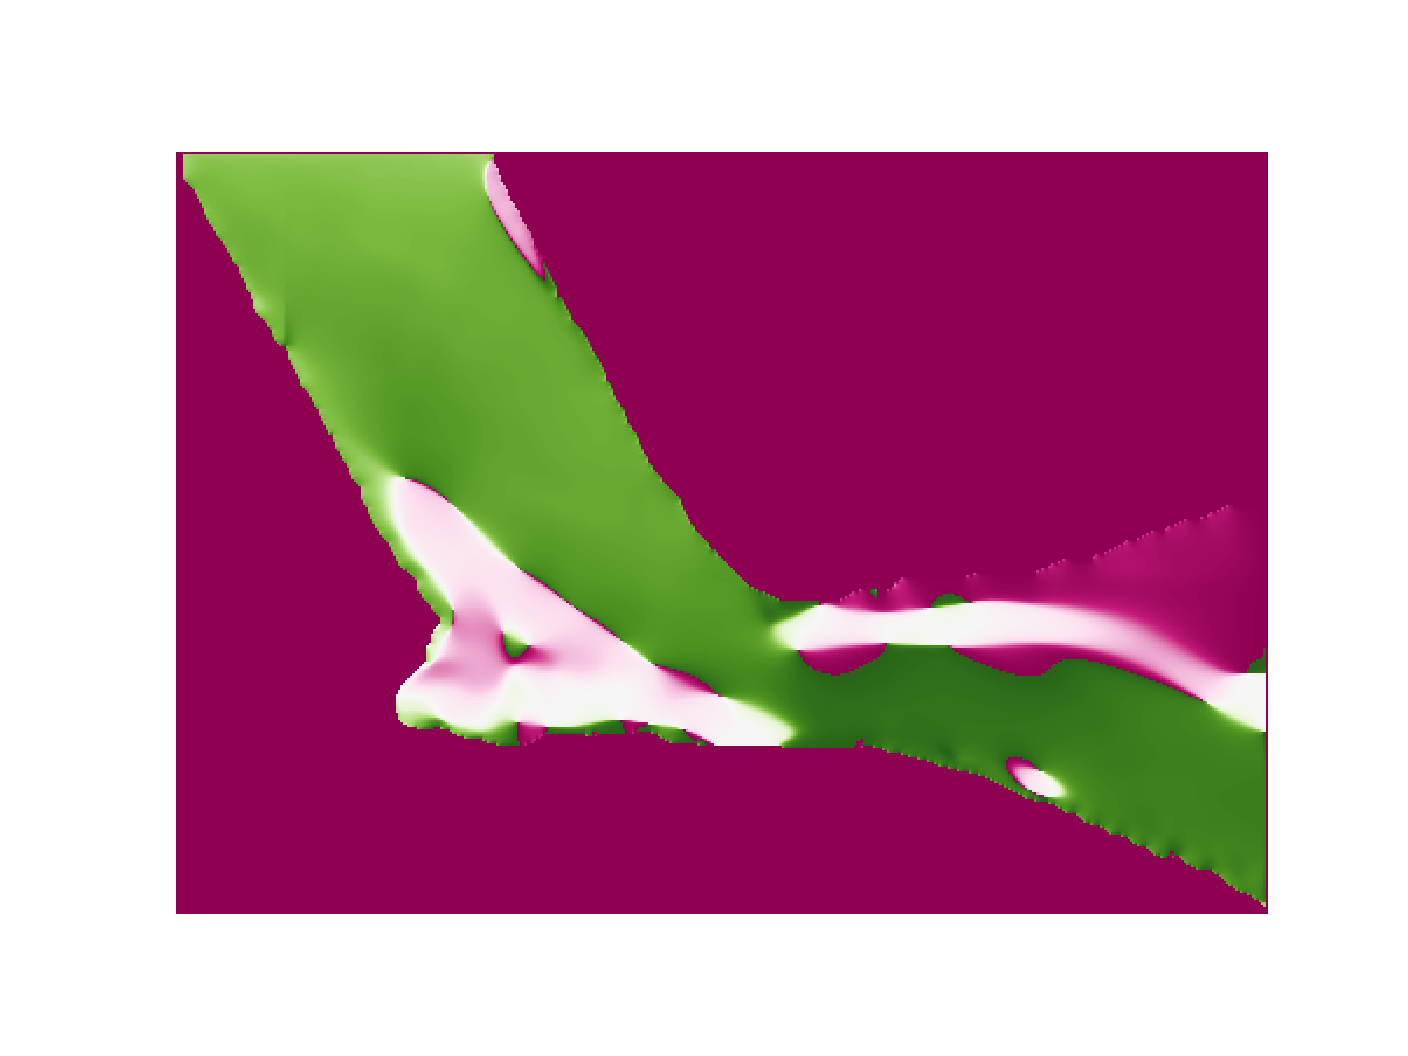

In [4]:
######################################################################
def parse_dat(file_name, verbose=True):
    dat_str = np.genfromtxt(file_name, delimiter = ' ', dtype='unicode')
    if verbose: print(dat_str)
    dat = []
    for row in dat_str:
        dat.append(np.float32(row.split()))
    dat = np.array(dat, dtype=np.float32)
    if verbose: print(dat.shape)
    return dat
######################################################################
# Read the files
vth_files = natsorted(glob.glob(os.path.join(vth_dir, '*.dat')))
vth_data = []
for idx, vth_file in enumerate(vth_files[:dimt]):
    idx = idx+1
    print('*'*50)
    # Read data from vth_file
    data = parse_dat(vth_file, verbose=debug)
    vth_data.append(data)

# Convert to numpy array
vth_data = np.array(vth_data).astype(np.float32)

print(vth_data.shape)
# print(vth_name)

######################################################################
# Take the magnitude and phase
mag = np.zeros((dimt, dimy, dimx), dtype=np.float32)
mag[:, vth_data[...,2].astype(np.int32), 
       vth_data[...,1].astype(np.int32)] = vth_data[...,3] # Magnitude
mag = mag[:,::-1,:]

# Take the angle
deg = np.zeros((dimt, dimy, dimx), dtype=np.float32)
deg[:, vth_data[...,2].astype(np.int32), 
       vth_data[...,1].astype(np.int32)] = vth_data[...,4] # Phase
deg = deg[:,::-1,:]

######################################################################
#Debug
if debug:
    plt.figure()
    plt.imshow(mag[-1,...], cmap=plt.cm.PiYG)
    plt.axis('equal')
    plt.axis('off')

    plt.figure()
    plt.imshow(deg[-1,...], cmap=plt.cm.PiYG)
    plt.axis('equal')
    plt.axis('off')

# Parse z and h

**************************************************
(329,)
['DSAA' '465\t324' '1\t465' '1\t324' '-5\t5']
(324, 465)
**************************************************
(329,)
['DSAA' '465\t324' '1\t465' '1\t324' '-5\t5']
(324, 465)
(2, 326, 467)
**************************************************
(328,)
['DSAA' '463\t323' '2\t464' '2\t324' '-1\t41']
(323, 463)
(1, 326, 467)


<IPython.core.display.Javascript object>


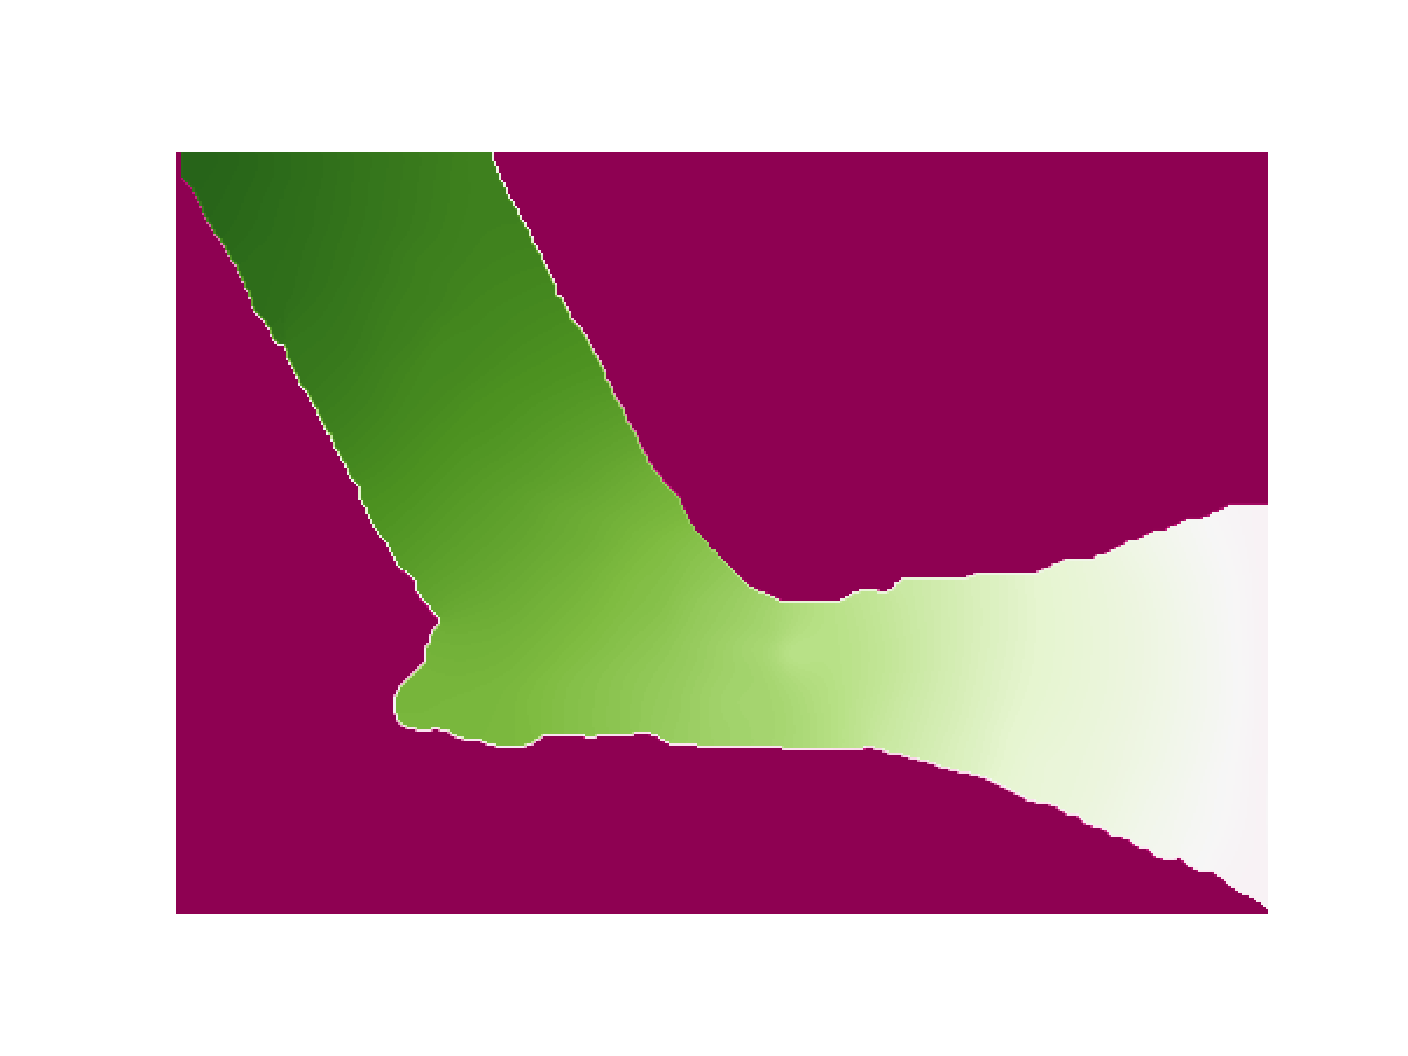

<IPython.core.display.Javascript object>


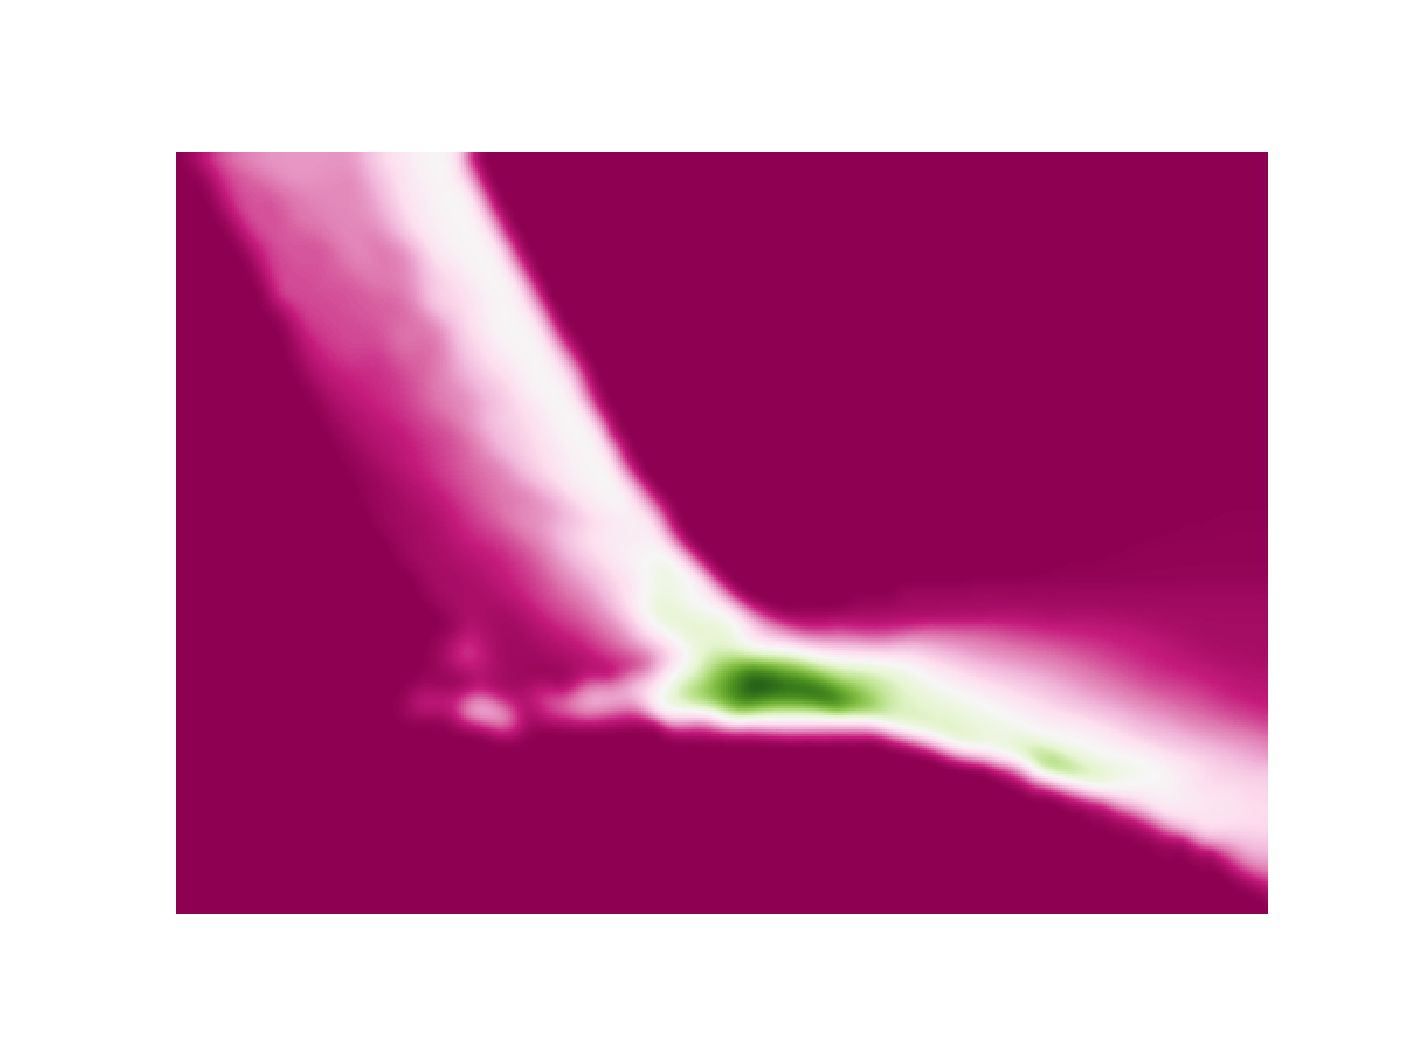

<IPython.core.display.Javascript object>


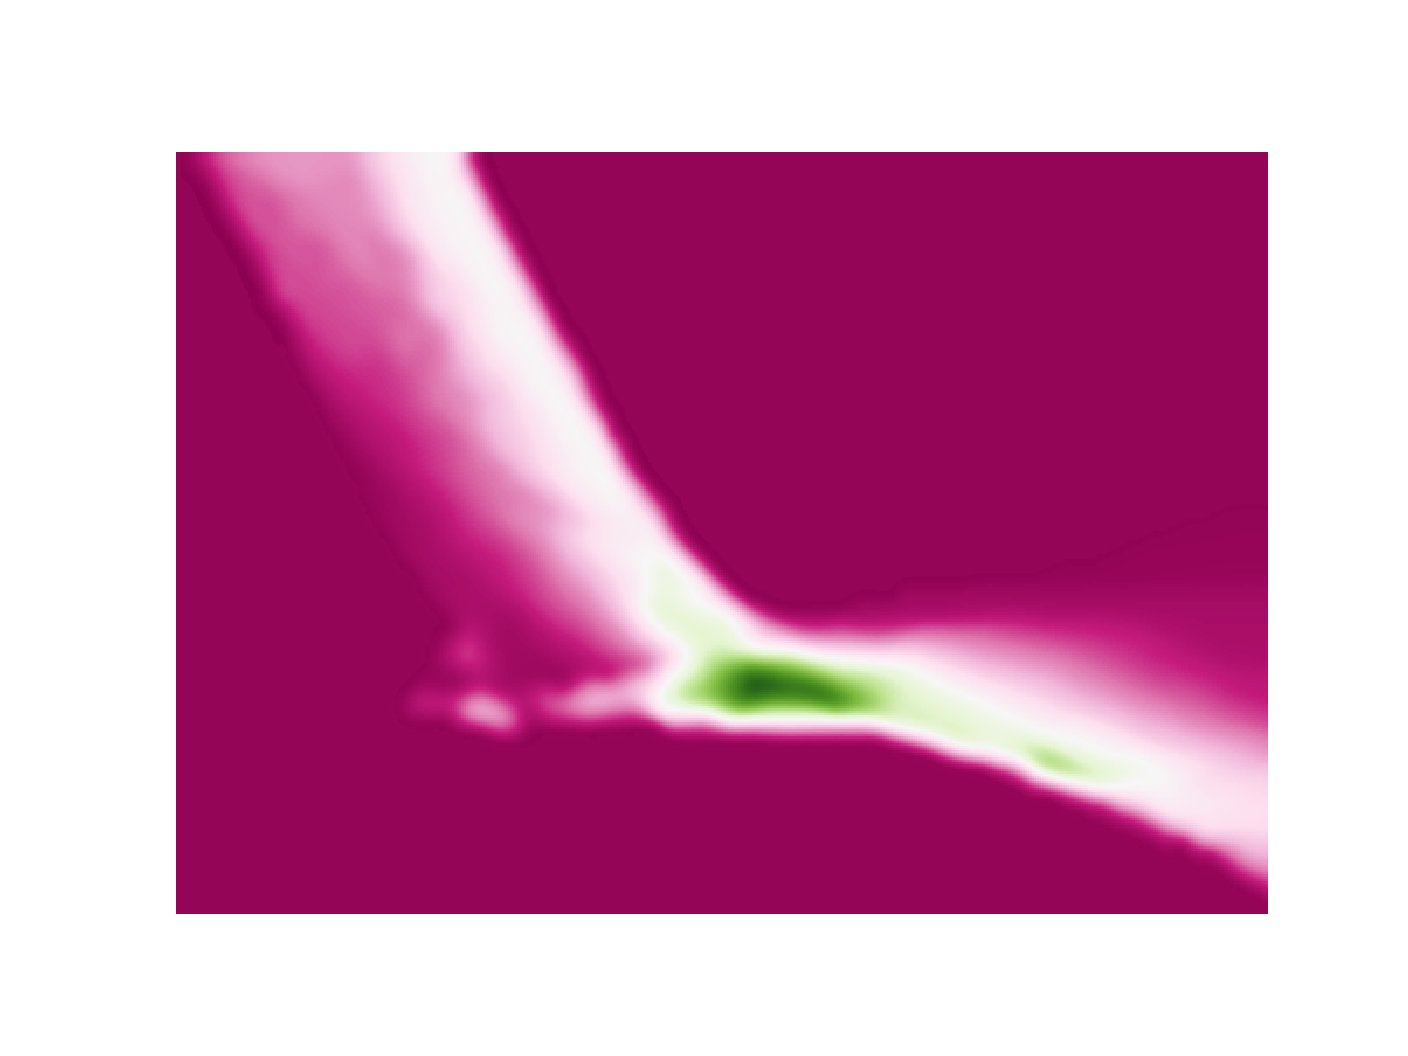

In [5]:
def parse_grd(file_name, verbose=True):
    grd_str = np.genfromtxt(file_name, delimiter = ' ', dtype='unicode')
    if verbose: print(grd_str.shape)
    if verbose: print(grd_str[:5])
    grd = []
    for row in grd_str[5:]: # Parse from the line number 5th
        grd.append(np.float32(row.split()))
    grd = np.array(grd, dtype=np.float32)
    if verbose: print(grd.shape)
    return grd
######################################################################
# Read the z files
z_files = natsorted(glob.glob(os.path.join(z_dir, '*.grd')))
z_data = []
for idx, z_file in enumerate(z_files[:dimt]):
    idx = idx+1
    print('*'*50)
    # Read data from vth_file
    data = parse_grd(z_file, verbose=debug)
    data = cv2.resize(data, (dimx, dimy))
    z_data.append(data)
    
# Convert to numpy array
z_data = np.array(z_data).astype(np.float32)

z_data = z_data[:,::-1,:]
print(z_data.shape)
# print(z_name)

######################################################################
# Read the h files
h_files = natsorted(glob.glob(os.path.join(h_dir, '*.grd')))
h_data = []
for idx, h_file in enumerate(h_files[:1]):
    idx = idx+1
    print('*'*50)
    # Read data from vth_file
    data = parse_grd(h_file, verbose=debug)
    data = cv2.resize(data, (dimx, dimy))
    h_data.append(data)
    
# Convert to numpy array
h_data = np.array(h_data).astype(np.float32)

h_data = h_data[:,::-1,:]
print(h_data.shape)
# print(h_name)

######################################################################
#Debug
if debug:
    plt.figure()
    plt.imshow(z_data[-1,...], cmap=plt.cm.PiYG)
    plt.axis('equal')
    plt.axis('off')

    plt.figure()
    plt.imshow(h_data[-1,...], cmap=plt.cm.PiYG)
    plt.axis('equal')
    plt.axis('off')

    plt.figure()
    plt.imshow(h_data[-1,...]-z_data[-1,...], cmap=plt.cm.PiYG)
    plt.axis('equal')
    plt.axis('off')

In [6]:
# print(z_data.max(), z_data.min())
print(h_data.max(), h_data.min())

39.506138 0.0


In [7]:
print(h_files)

['data/VB_0519/H/HtaiZ (2).grd']
